### HR Employee Attrition dataset (https://www.kaggle.com/datasets/saurabhbadole/hr-employee-attrition) 
#### This is a historical Employee Data with a number of features about each employee. This dataset provides information on employees within an organization, including their demographics, job-related factors, and attrition status. Dataset has 35 columns and 1470 rows. This is a classification dataset and I will perfom decision tree machine learning model here.

#### This dataset is taken from Exercise_project_2. Data analysis and optimisation was made already.I will use  MODEL_3 which has different support variables than 2 other models. I performed optimization after receiving feedback from the instructor. All other support variables are the same as in Model_2.

In [27]:
# Needed imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import dtreeviz

In [28]:
# load the dataset:
df = pd.read_csv("HR-Employee-Attrition.csv")

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Target variable - "Attrition" column (show how likely someone is to quit), it has binary yes/no values. Here are a lot of other variables. I will choose support variable base on correlation to "Attrition" column. First, I will clean up the dataset:

### Cleaning up the dataset:

In [29]:
# checking for dublicates,
# No duplicates.
df.duplicated().sum()

0

In [30]:
# no missing values:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [31]:
# checking target variable.
# only yes/no values. I will use LabelEncoder to converts the value of column to 0 or 1.
# just before LabelEncoder I will check other variable that may also need that, so I can encoder all at once.
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [32]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [33]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [34]:
# some columns are not related to attrition: "Over18" - all employees are adults, "EmployeeNumber" - not usefull, 
# "EmployeeCount" - constant value for this dataset;"EducationField" and "Department" - column is categorical, 
# they can be usefull but we have enough other options for support variable; The "Education" column is a numerical
# feature that represents education level, but it may not strongly influence attrition compared to salary orjob satisfaction.
# "MaritalStatus"- does not relate to attrition, "OverTime" - Indicates if the employee works overtime, i think it doesn't relate to attrition.
#  I will drop those columns:

columns_to_drop = [
    'Over18',
    'EmployeeCount',
    'EmployeeNumber',
    'Department',
    'EducationField',
    "Education",
    "MaritalStatus",
    "OverTime"
]

df = df.drop(columns_to_drop, axis=1)

In [35]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,1,2,Female,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,8,3,Male,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,2,4,Male,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,3,4,Female,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,2,1,Male,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [36]:
# now the dataset has three columns with categorical values: "BusinessTravel", "JobRole" and "Gender" not counting target column.
# let's check "BusinessTravel" column. It has three different values, I will keep it and convert categories into numerical form
# using one-hot encoded. I kept this variable because frequent business travel is often associated with higher attrition due to stress and job demands.

df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [37]:
# use of OneHotEncoder for "BusinessTravel" column , it will create multiple columns with numeric values:
from sklearn.preprocessing import OneHotEncoder
variables = ["BusinessTravel"]
             
# use encoder:
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [38]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,Yes,1102,1,2,Female,94,3,2,Sales Executive,...,8,0,1,6,4,0,5,0,0,1
1,49,No,279,8,3,Male,61,2,2,Research Scientist,...,10,3,3,10,7,1,7,0,1,0
2,37,Yes,1373,2,4,Male,92,2,1,Laboratory Technician,...,7,3,3,0,0,0,0,0,0,1
3,33,No,1392,3,4,Female,56,3,1,Research Scientist,...,8,3,3,8,7,3,0,0,1,0
4,27,No,591,2,1,Male,40,3,1,Laboratory Technician,...,6,3,3,2,2,2,2,0,0,1


In [39]:
# next we will remove one new boolean variable "BusinessTravel_Travel_Rarely" (since it's going to be represented
# by a straight line of zeroes)
df = df.drop("BusinessTravel_Travel_Rarely", axis=1)

In [40]:
df.head( )

,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently
0,41,Yes,1102,1,2,Female,94,3,2,Sales Executive,...,0,8,0,1,6,4,0,5,0,0
1,49,No,279,8,3,Male,61,2,2,Research Scientist,...,1,10,3,3,10,7,1,7,0,1
2,37,Yes,1373,2,4,Male,92,2,1,Laboratory Technician,...,0,7,3,3,0,0,0,0,0,0
3,33,No,1392,3,4,Female,56,3,1,Research Scientist,...,0,8,3,3,8,7,3,0,0,1
4,27,No,591,2,1,Male,40,3,1,Laboratory Technician,...,1,6,3,3,2,2,2,2,0,0


In [41]:
# "JobRole" column. Job role can significantly impact attrition, so i will keep at this time this variable and will use one hot encoding.
# I will check how many different values are in this column.
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [42]:
# use of OneHotEncoder for "JobRole" column , it will create multiple columns with numeric values:
variables = ["JobRole"]
# use encoder:
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas") 
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables) 
df.head()


,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,BusinessTravel_Travel_Frequently,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,Yes,1102,1,2,Female,94,3,2,4,...,0,0,0,0,0,0,0,0,1,0
1,49,No,279,8,3,Male,61,2,2,2,...,1,0,0,0,0,0,0,1,0,0
2,37,Yes,1373,2,4,Male,92,2,1,3,...,0,0,0,1,0,0,0,0,0,0
3,33,No,1392,3,4,Female,56,3,1,3,...,1,0,0,0,0,0,0,1,0,0
4,27,No,591,2,1,Male,40,3,1,2,...,0,0,0,1,0,0,0,0,0,0


In [43]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative'],
      dtype='object')

In [44]:
# next we will remove one new boolean variable "JobRole_Sales Representative" (since it's going to be represented        
# by a straight line of zeroes)
df = df.drop("JobRole_Sales Representative", axis=1)     
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive
0,41,Yes,1102,1,2,Female,94,3,2,4,...,0,0,0,0,0,0,0,0,0,1
1,49,No,279,8,3,Male,61,2,2,2,...,0,1,0,0,0,0,0,0,1,0
2,37,Yes,1373,2,4,Male,92,2,1,3,...,0,0,0,0,1,0,0,0,0,0
3,33,No,1392,3,4,Female,56,3,1,3,...,0,1,0,0,0,0,0,0,1,0
4,27,No,591,2,1,Male,40,3,1,2,...,0,0,0,0,1,0,0,0,0,0


In [45]:
# "Gender" column, I will check unique options, should be just two but who knows...
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [46]:
# now we will use LabelEncoder to converts the value of column to 0 or 1 for "Gender" and "Attrition" columns:

from sklearn.preprocessing import LabelEncoder
# list of all boolean variables we want to convert
variables = ['Gender', 'Attrition']

# initalize encoder and convert everything
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [47]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive
0,41,1,1102,1,2,0,94,3,2,4,...,0,0,0,0,0,0,0,0,0,1
1,49,0,279,8,3,1,61,2,2,2,...,0,1,0,0,0,0,0,0,1,0
2,37,1,1373,2,4,1,92,2,1,3,...,0,0,0,0,1,0,0,0,0,0
3,33,0,1392,3,4,0,56,3,1,3,...,0,1,0,0,0,0,0,0,1,0
4,27,0,591,2,1,1,40,3,1,2,...,0,0,0,0,1,0,0,0,0,0


In [48]:
# "StandardHours" column contains a single constant value (80) for all rows, it does not provide any useful information
# I will drop it.
df['StandardHours'].head(5)

0    80
1    80
2    80
3    80
4    80
Name: StandardHours, dtype: int64

In [49]:
df = df.drop("StandardHours", axis=1)

#### Now, all columns contain only numeric values. In total, there are 28 columns. Next, we will check the data distribution and correlation to decide which columns to keep for the logistic regression model.

### Visualising the Data.

<Axes: >

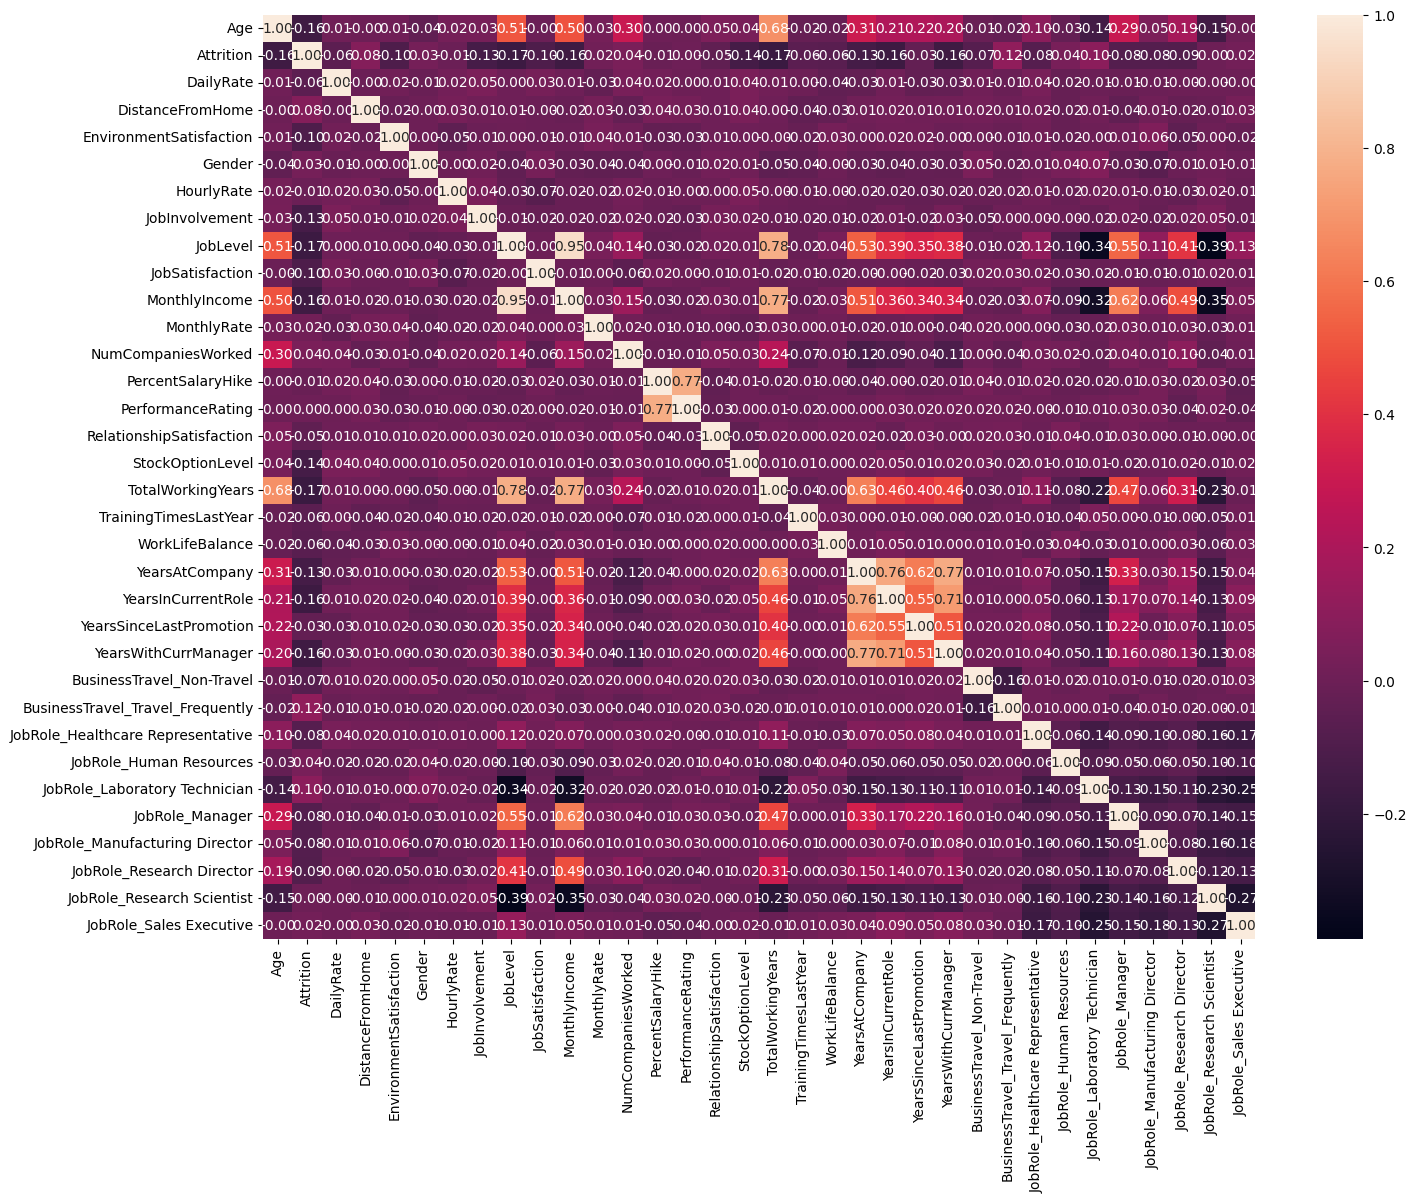

In [50]:
# it was difficult to see numbers, so we will increase the figure size:
plt.figure(figsize=(16, 12))

# on this correlation matrix we can see the most important supported variables:
# median_income. Also, "ocean_proximity_<1H OCEAN" variale correlate with out target variable and
# "ocean_proximity_INLAND" has negative correlation. 
correlations = df.corr(numeric_only=True)
sns.heatmap(correlations, annot=True, fmt='.2f')

In [51]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive'],
      dtype='object')

##### Correlation matrix shows that there is no strong correlations with "Attrition" column. But we will keep columns that have weak correlation. 

In [52]:
# "Gender" - low correlation; "HourlyRate" - Similar to DailyRate, not needed if DailyRate is included; "MonthlyRate" - there is MonthlyIncome that i will keep for now;
# "RelationshipSatisfaction " -  less useful compared to JobSatisfaction;"DistanceFromHome" - low correlation rate;"PerformanceRating" - 0 correlation rate;
# "NumCompaniesWorked" - very low correlation rate;"PercentSalaryHike" - also too low correlation rate.

columns_to_drop_aftercorr = [
    'Gender',
    'HourlyRate',
    'MonthlyRate',
    'RelationshipSatisfaction',
    'DistanceFromHome',
    'PerformanceRating',
    'NumCompaniesWorked',
    'PercentSalaryHike'
]

df = df.drop(columns_to_drop_aftercorr, axis=1)


In [53]:
len(df.columns)

26

In [54]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive'],
      dtype='object')

##### After cleaning we have 17 support variables, that is a lot. It is good to check for multicollinearity as some columns has very strong correlations (like these: 'YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'). To implement multicollinearity (VIF-test) we need to define X/y first.

###  X/y -split + VIF -test

In [55]:
 # use everything else except, the target
X = df.drop("Attrition", axis=1)

# our target variable is y
y = df['Attrition']

In [56]:
# Finding columns with potential multicollinearity (VIF-test)
# pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
# VIF = Variance Inflation Factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  

# variables with high VIF-value 
# can mean multlicollinearity (variables providing same linear
# relationships in the data, confusing the logistic regression
print(vif_data)

                              feature        VIF
0                                 Age  28.457561
1                           DailyRate   4.846228
2             EnvironmentSatisfaction   6.843995
3                      JobInvolvement  13.736666
4                            JobLevel  61.416386
5                     JobSatisfaction   6.690383
6                       MonthlyIncome  52.226580
7                    StockOptionLevel   1.888832
8                   TotalWorkingYears  13.876001
9               TrainingTimesLastYear   5.461040
10                    WorkLifeBalance  13.471322
11                     YearsAtCompany  10.300138
12                 YearsInCurrentRole   6.504071
13            YearsSinceLastPromotion   2.467325
14               YearsWithCurrManager   6.588369
15          BusinessTravel_Non-Travel   1.157491
16   BusinessTravel_Travel_Frequently   1.272736
17  JobRole_Healthcare Representative   3.105383
18            JobRole_Human Resources   1.572202
19      JobRole_Labo

In [57]:
# in this model_2, based on correlations and VIF-test I dropped also 'DailyRate', 'JobSatisfaction','YearsSinceLastPromotion',
# 'TrainingTimesLastYear' and'BusinessTravel_Non-Travel' columns in addition to other columns that I dropped on model_1. 

columns_to_drop_after_vif = [
    'Age',
    'MonthlyIncome',
    'WorkLifeBalance',
    'YearsAtCompany', 
    'DailyRate',
    'JobSatisfaction',
    'YearsSinceLastPromotion',
    'TrainingTimesLastYear',
    'BusinessTravel_Non-Travel',
    'YearsInCurrentRole', 
    'EnvironmentSatisfaction',
    'JobLevel', 
    'JobInvolvement',
    "TotalWorkingYears",
]    
df = df.drop(columns_to_drop_after_vif, axis=1)

In [58]:
 # use everything else except, the target
X = df.drop("Attrition", axis=1)

# our target variable is y
y = df['Attrition']

In [59]:
# VIF dataframe 
# VIF = Variance Inflation Factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  

# variables with high VIF-value 
# can mean multlicollinearity (variables providing same linear
# relationships in the data, confusing the logistic regression
print(vif_data)

                              feature       VIF
0                    StockOptionLevel  1.821917
1                YearsWithCurrManager  2.586201
2    BusinessTravel_Travel_Frequently  1.208030
3   JobRole_Healthcare Representative  1.252140
4             JobRole_Human Resources  1.062067
5       JobRole_Laboratory Technician  1.346840
6                     JobRole_Manager  1.284207
7      JobRole_Manufacturing Director  1.304785
8           JobRole_Research Director  1.224427
9          JobRole_Research Scientist  1.358469
10            JobRole_Sales Executive  1.631603


##### So, this model has supprt variables with VIF < 3

<Axes: >

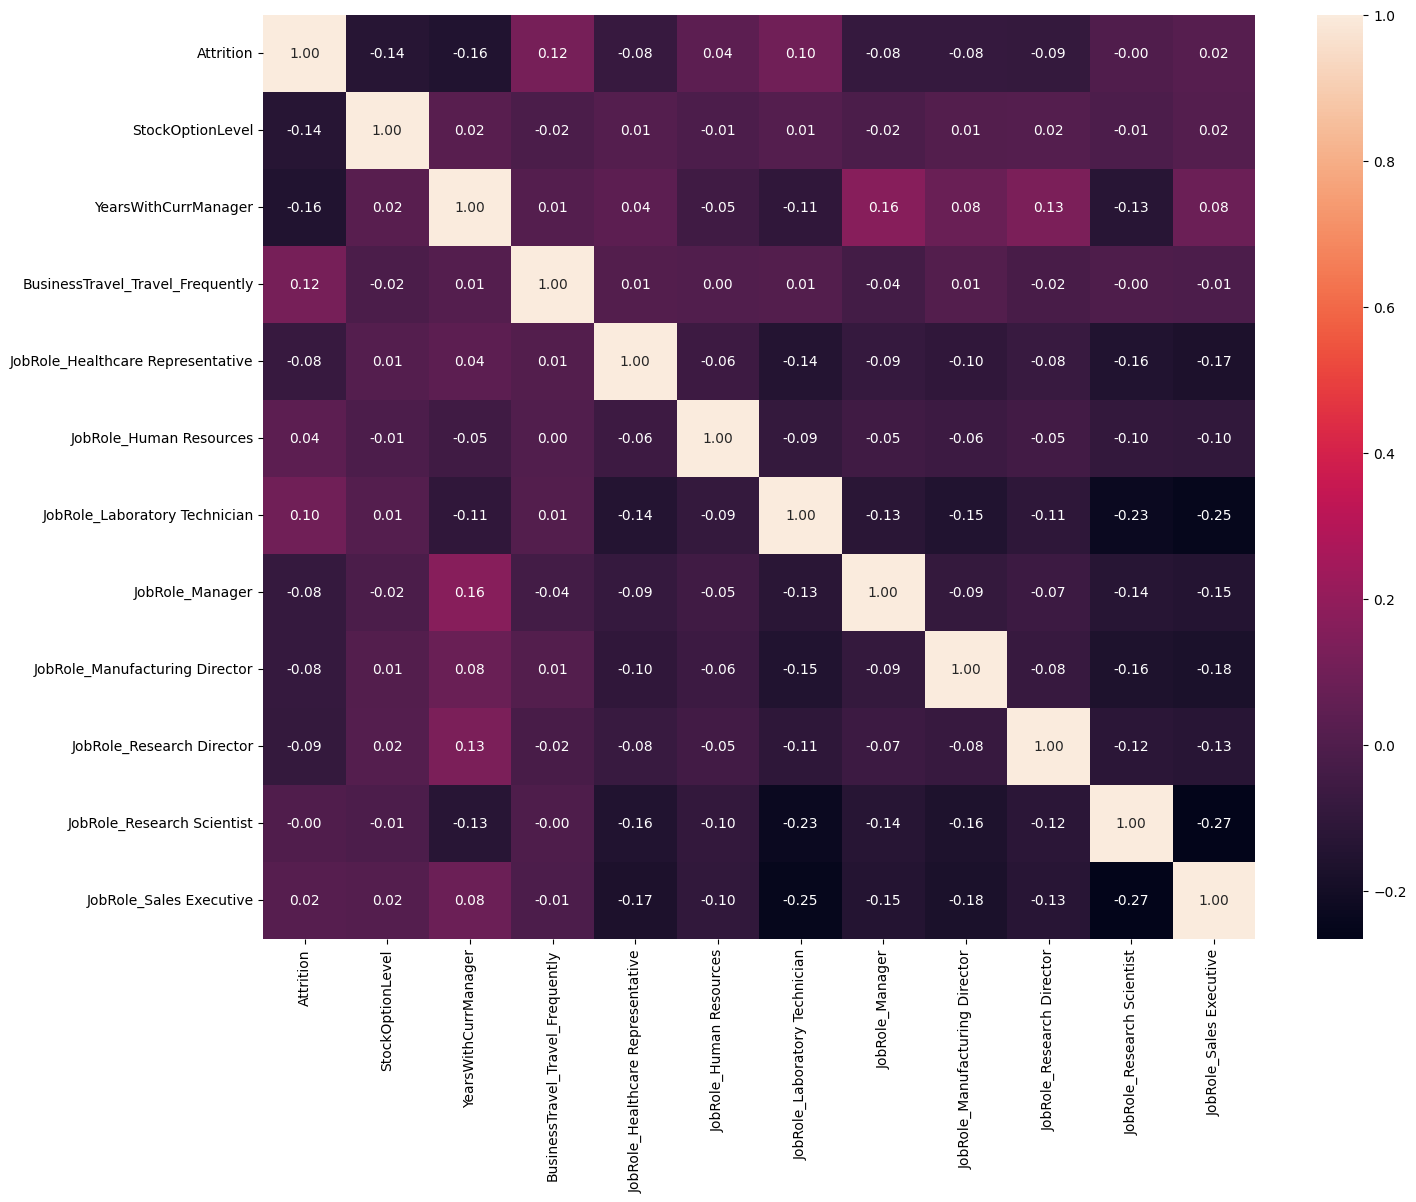

In [60]:
# let's check the correlation matrix again, it will be smaller now:
plt.figure(figsize=(16, 12))
correlations = df.corr(numeric_only=True)
sns.heatmap(correlations, annot=True, fmt='.2f')

#### Correlation matrix is smaller now, easier to read. We can see that JobRole don't correlate with target variable.

### Fitting the Decision Tree algorithm with our X/y

In [61]:
# Fit the decision tree classifier with default hyper-parameters
clf = DecisionTreeClassifier()
model = clf.fit(X, y)

In [63]:
# visualize the decision tree
from sklearn.tree import export_graphviz
import subprocess
from sklearn import tree

# save the decision tree visualization into an svg-file
export_graphviz(clf, feature_names=X.columns, class_names=["No", "Yes"],
                filled=True, rounded=True, node_ids=True, out_file="attrition_tree.dot")

# convert the DOT-file into SVG-file (which is supported by many tools
subprocess.call(["dot", "-Tsvg", "attrition_tree.dot", '-o', 'dt_attrition_test_sk.svg'])

FileNotFoundError: [WinError 2] The system cannot find the file specified